# Test Specific Model

In [1]:
from PlantReactivityAnalysis.features.features_dataset import FeaturesDataset
from PlantReactivityAnalysis.models.experiment import Experiment
import PlantReactivityAnalysis.data.get_dataset as gd
import PlantReactivityAnalysis.models.parameters as param
from PlantReactivityAnalysis.config import PROCESSED_DATA_DIR
import ast

# Preparation

In [2]:
params= {'model_name': 'xgb', 'parameters': "{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100, 'random_state': 42}", 'f1': 0.4417189355301867, 'accuracy': 0.4433701657458563, 'precision': 0.4417115977441003, 'recall': 0.4433701657458563, 'confusion_matrix': '[[103  73  75]\n [ 57 123  53]\n [ 79  66  95]]', 'Dataset': 4, 'RQ': 2, 'Normalization': 'norm', 'Window Size': 1.0, 'Hop Length': 0.5, 'Correlation Treshold': 0.8}

In [2]:
params= {'model_name': 'gradientboosting', 'parameters': "{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42}", 'f1': 0.453625332256142, 'accuracy': 0.4585635359116022, 'precision': 0.4539205975541948, 'recall': 0.4585635359116022, 'confusion_matrix': '[[ 95  68  88]\n [ 49 142  42]\n [ 72  73  95]]', 'RQ': 2, 'Window Size': 1.0, 'Hop Length': 1.0, 'Correlation Treshold': 0.9}

In [5]:
ct = pca = params['Correlation Treshold']
rqs = [params['RQ']]
rq = params['RQ']
parameters= params['parameters']
param_combination = ast.literal_eval(parameters)
model= params['model_name']
file_name = "features_dataset_norm_letters_ws1_hl1.pkl"
file_path = PROCESSED_DATA_DIR / 'segmented_by_letters' / file_name

In [8]:
datasets= gd.get_dataset_by_question(file_path, rqs, corr_threshold=ct)

Dataset loaded from C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\data\processed\segmented_by_letters\features_dataset_norm_letters_ws1_hl0.5.pkl. Shape: (8878, 187)
Removing columns with NaN values: ['skewness', 'kurtosis']

# Research Question:  2
-Train distribution-
Counts and Percentages:
Class 0: Count = 965, Percentage = 33.37%
Class 1: Count = 964, Percentage = 33.33%
Class 2: Count = 963, Percentage = 33.30%
-Test distribution-
Counts and Percentages:
Class 0: Count = 251, Percentage = 34.67%
Class 2: Count = 240, Percentage = 33.15%
Class 1: Count = 233, Percentage = 32.18%
Reduced variable features from initial count to 71.
                                        1             0             2  \
cepstra_1_avg                2.868317e-01  3.130257e-01  2.862778e-01   
cepstra_2_avg                2.633632e-01  2.868960e-01  2.629122e-01   
cepstra_3_avg                2.370750e-01  2.575376e-01  2.354080e-01   
cepstra_4_avg                2.266436e-01  2.463198e-

# Train and Test model

In [10]:
train_df, test_df = datasets[rq]
experiment = Experiment(train_df, test_df)

In [11]:
experiment.train_and_evaluate_model(model_name= model, param_combination= param_combination)
experiment.train_and_evaluate_model(model_name= model, param_combination= param_combination)

C:\Users\alvar\anaconda3\envs\Plant-Reactivity-Analysis\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Metrics for gradientboosting with params {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42}              : F1: 0.4098951493823942, Accuracy: 0.4129834254143646, Precision: 0.40895073132331555, Recall: 0.4129834254143646
Metrics for gradientboosting with params {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42}              : F1: 0.4098951493823942, Accuracy: 0.4129834254143646, Precision: 0.40895073132331555, Recall: 0.4129834254143646


C:\Users\alvar\anaconda3\envs\Plant-Reactivity-Analysis\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


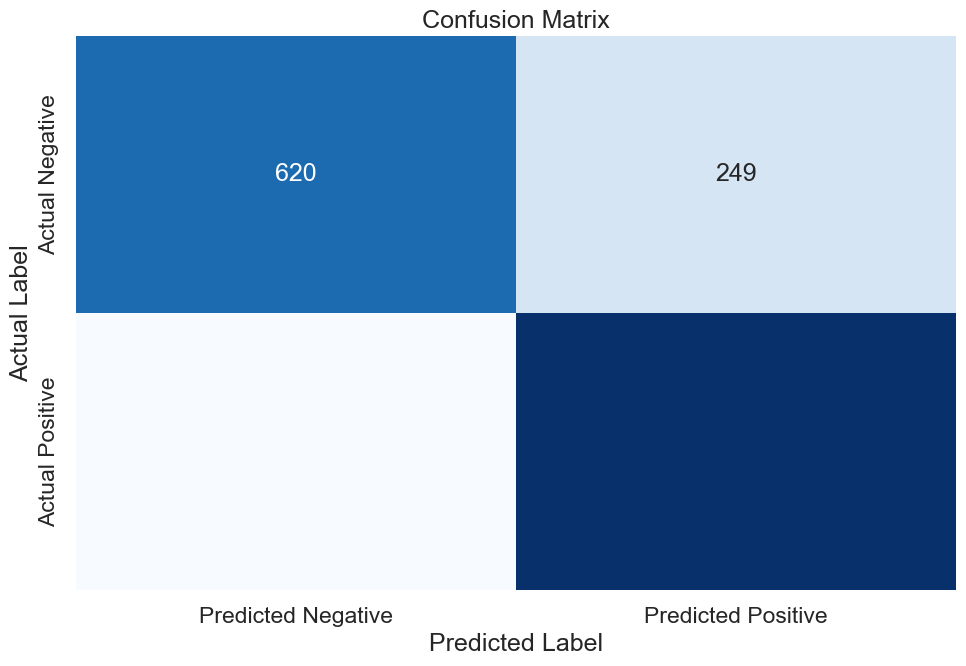

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Given confusion matrix
conf_matrix = np.array([[620, 249], [145, 762]])

# Set the context and a larger font for clarity
sns.set(context='talk', style='white')

# Create the heatmap for the confusion matrix
plt.figure(figsize=(10, 7))  # Set the figure size
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()  # Adjust the layout to make room for the labels

plt.show()


# Saved Model

In [8]:
from joblib import load

model = load(r"C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\models\ds4\rq2\ws1.0_hl0.5_ct0.8_normnorm\best_xgb.joblib")

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

def evaluate_model(test_df, model, target_column):
    """
    Evaluates a classification model on a test dataset.

    Parameters:
    - test_df: A pandas DataFrame containing the test features and target column.
    - model: The trained model to evaluate.
    - target_column: The name of the target column in test_df.

    Prints the accuracy, classification report, and confusion matrix.
    """
    # Separate features and target
    X_test = test_df.drop(columns=[target_column])
    y_test = test_df[target_column]
    # X_test = X_test.to_numpy()

    # Make predictions
    predictions = model.predict(X_test)

    # Print accuracy
    print("Accuracy:", accuracy_score(y_test, predictions))

    # Print classification report
    print("\nClassification Report:\n", classification_report(y_test, predictions))

    # Print confusion matrix
    cm = confusion_matrix(y_test, predictions)
    cm_df = pd.DataFrame(cm, 
                         index=np.unique(y_test), 
                         columns=np.unique(y_test))
    print("\nConfusion Matrix:\n", cm_df)

evaluate_model(test_df, model, 'target')

Accuracy: 0.44337016574585636

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.41      0.42       251
           1       0.47      0.53      0.50       233
           2       0.43      0.40      0.41       240

    accuracy                           0.44       724
   macro avg       0.44      0.44      0.44       724
weighted avg       0.44      0.44      0.44       724


Confusion Matrix:
      0    1   2
0  103   73  75
1   57  123  53
2   79   66  95
